In [14]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
import numpy as np

In [2]:
iris = datasets.load_iris()

In [5]:
X = iris.data[:,[2,3]]
y = iris.target

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [13]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

We'll start with the perceptron performance. We know it will not perform well on the iris dataset because the data is not linearly separable.

In [53]:
step_sizes = np.array([0.1,0.05,0.025,0.01,0.005,0.0025,0.001])
misclass = np.array([])
accuracy = 
for step in step_sizes:
    ppn = Perceptron(max_iter=50, eta0=step)
    ppn.fit(X_train_std, y_train)
    y_pred = ppn.predict(X_test_std)
    misclass = np.append(misclass,(y_test !=y_pred).sum())

Text(0.5, 0, 'Learning Rates')

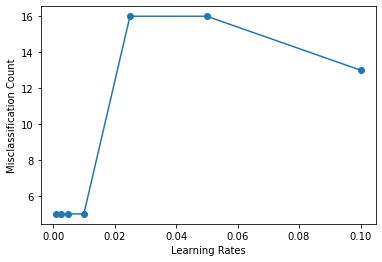

In [54]:
import matplotlib.pyplot as plt
plt.plot(step_sizes,misclass,marker='o')
plt.ylabel('Misclassification Count')
plt.xlabel('Learning Rates')

In [70]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min,x1_max = X[:,0].min() -1, X[:,0].max()+1
    x2_min,x2_max = X[:,1].min() -1, X[:,1].max()+1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y==c1,0],y=X[y==c1,1],alpha=0.8,c=cmap(idx),marker=markers[idx],label=c1)
    if test_idx:
        X_test, y_test = X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],color='gray',alpha=0.5,linewidths=1,marker='o',s=55,label='test set')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


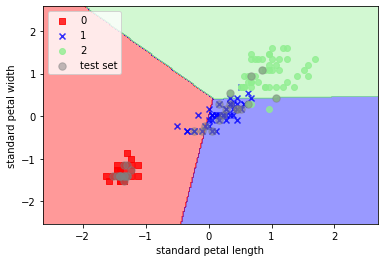

In [71]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=ppn,test_idx=range(120,150))
plt.xlabel('standard petal length')
plt.ylabel('standard petal width')
plt.legend()


Let's now attempt to work with the logistic regression while working through some of the math.